In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential

In [12]:
# Load dataset
data = pd.read_csv('boston_housing_prices.csv')

X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
def build_enhanced_model():
    model = Sequential()  # Using Sequential from tensorflow.keras.models
    model.add(layers.Input(shape=(X_train.shape[1],)))  # Input layer
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    # Add more layers as needed...
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_enhanced_model()

In [15]:
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 596.4009 - mae: 22.6597 - val_loss: 550.0999 - val_mae: 21.9243
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 597.3178 - mae: 22.6159 - val_loss: 547.6591 - val_mae: 21.8728
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 584.7232 - mae: 22.4274 - val_loss: 545.0474 - val_mae: 21.8168
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 632.9877 - mae: 23.2880 - val_loss: 542.3356 - val_mae: 21.7589
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 597.3544 - mae: 22.5238 - val_loss: 539.5005 - val_mae: 21.6981
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 565.5074 - mae: 21.7973 - val_loss: 536.5578 - val_mae: 21.6351
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 622.3340 - mae: 22.8934 - val_loss: 533.8379 - val_mae: 21.5762
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 613.6113 - mae: 22.7330 - val_loss: 530.8918 - val_mae: 21.5123
Epoch 9/100
21/2

Epoch 53/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 412.5256 - mae: 18.3987 - val_loss: 415.5381 - val_mae: 18.7176
Epoch 54/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 487.1781 - mae: 19.8685 - val_loss: 413.6561 - val_mae: 18.6648
Epoch 55/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 485.2016 - mae: 19.7309 - val_loss: 411.5602 - val_mae: 18.6067
Epoch 56/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 464.1618 - mae: 19.4100 - val_loss: 409.4933 - val_mae: 18.5495
Epoch 57/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 442.7137 - mae: 18.9426 - val_loss: 407.3378 - val_mae: 18.4892
Epoch 58/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 423.0733 - mae: 18.6103 - val_loss: 405.3442 - val_mae: 18.4330
Epoch 59/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 426.2776 - mae: 18.4632 - val_loss: 403.3424 - val_mae: 18.3757
Epoch 60/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 443.0587 - mae: 19.0082 - val_loss: 401.2614 - val_mae: 18.3159
Epoch 61

In [16]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on test data: {test_mae_score}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 303.5375 - mae: 15.6522 
Mean Absolute Error on test data: 15.661805152893066


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


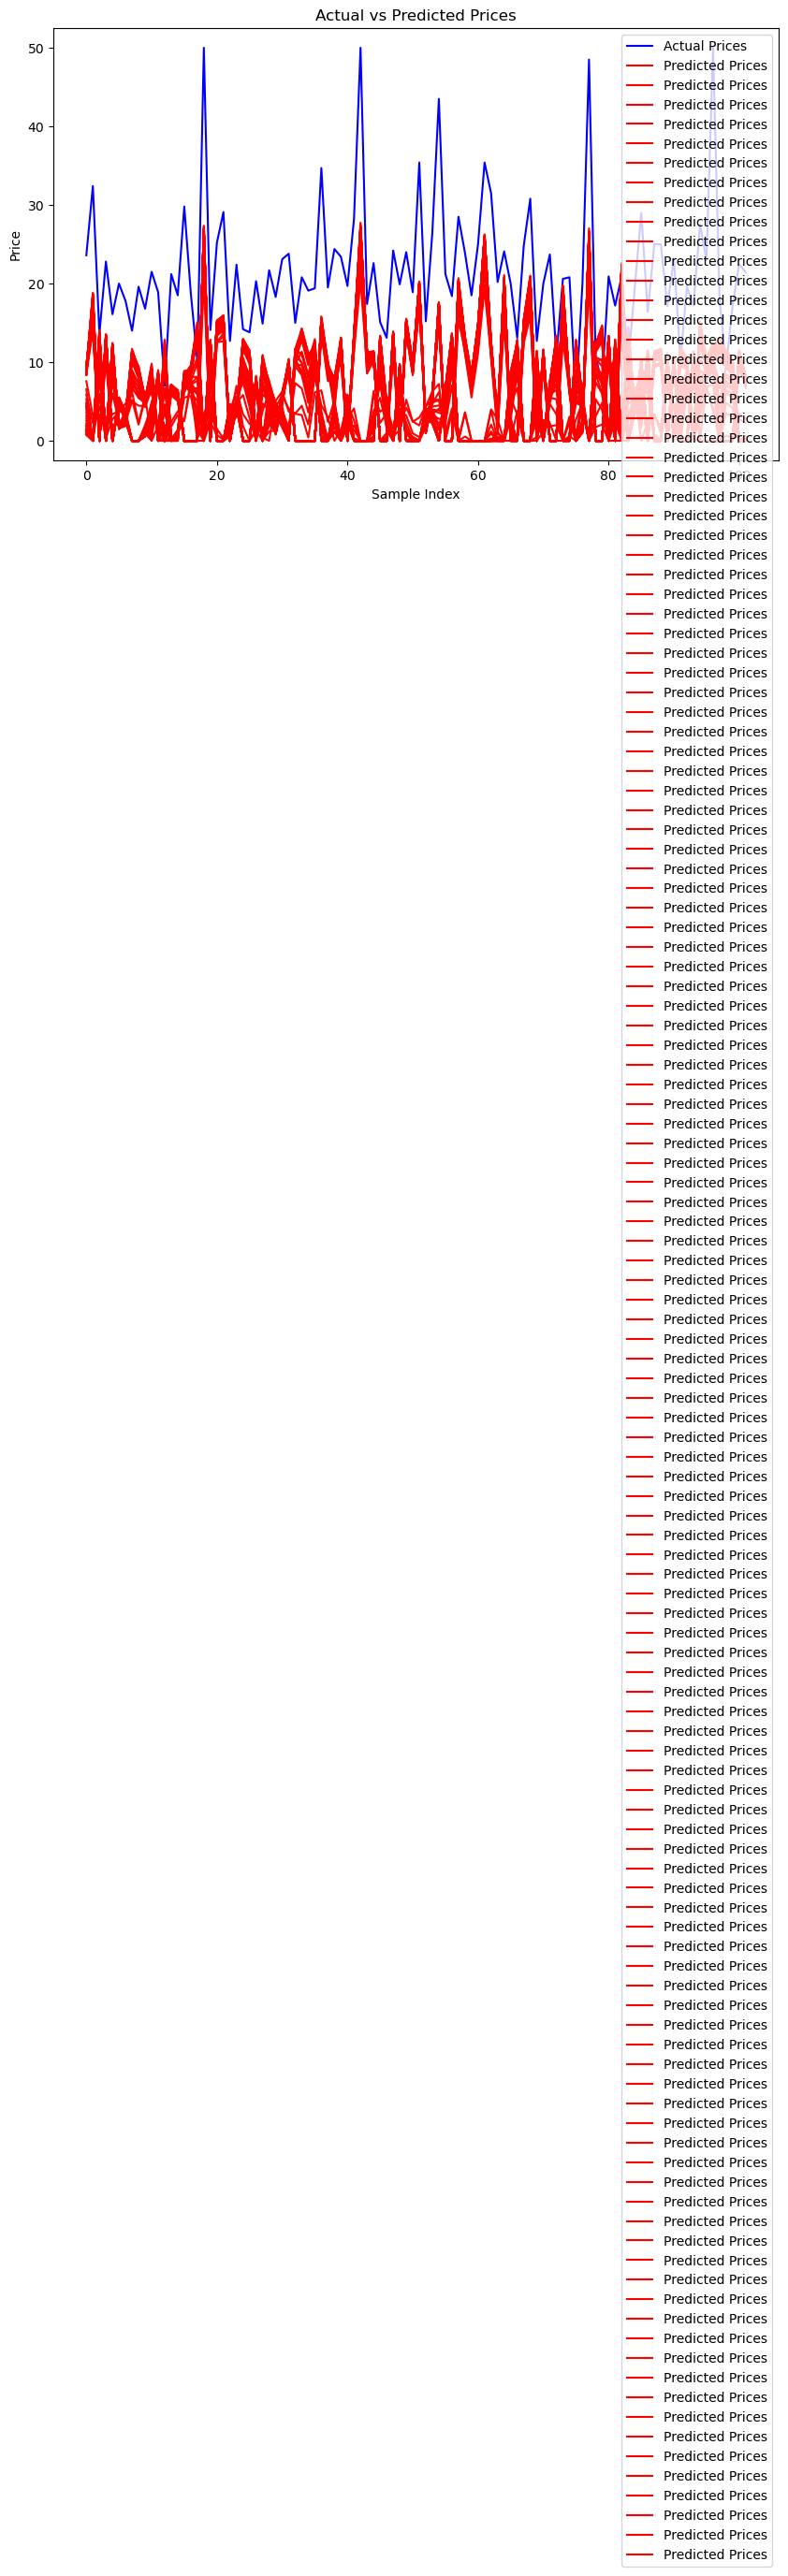

In [17]:
predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()